# Economic sentiment and confidence indicators by sector - monthly data

- EI_BSSI_M_R2
- id:["freq","indic","s_adj","geo","time"]
- "indic":"label":"Indicator"
    - "BS-CCI-BAL":"Construction confidence indicator",
    - "BS-ESI-I":"Economic sentiment indicator",
    - "BS-ICI-BAL":"Industrial confidence indicator",
    - "BS-RCI-BAL":"Retail confidence indicator",
    - "BS-CSMCI-BAL":"Consumer confidence indicator",
    - "BS-SCI-BAL":"Services confidence indicator"
- "s_adj":"label":"Seasonal adjustment"
    - "NSA":"Unadjusted data (i.e. neither seasonally adjusted nor calendar adjusted data)",
    - "SA":"Seasonally adjusted data, not calendar adjusted data"
- https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/nama_10_a64_p5?geo=IT&time=2023



- "BS-ESI-I",        # Economic sentiment (composito)
- "BS-ICI-BAL",      # Industria
- "BS-SCI-BAL",      # Servizi
- "BS-CCI-BAL",      # Costruzioni
- "BS-RCI-BAL",      # Commercio al dettaglio
- "BS-CSMCI-BAL"     # Consumi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("D:/PKM/Github/Eurostat/codice")  # Aggiunge il path dove si trova il modulo
from eurostat_utils import fetch_eurostat_data # questa è la mia funzione per estrarre i json

sys.path.append("D:/PKM/Github/Eurostat/codice")  # Aggiunge il path dove si trova il modulo
from eurostat_utils import fetch_eurostat_data # questa è la mia funzione per estrarre i json
df = fetch_eurostat_data("EI_BSSI_M_R2", {
    'indic': ["BS-CCI-BAL","BS-ESI-I","BS-ICI-BAL","BS-RCI-BAL","BS-CSMCI-BAL","BS-SCI-BAL"],
    's_adj': 'SA',
    'geo': ['EA20','IT'],
})

In [19]:
# filtri
df = df[df["indic_code"] != "BS-ESI-I"]
df = df[df['time'] > '2010-01-01']

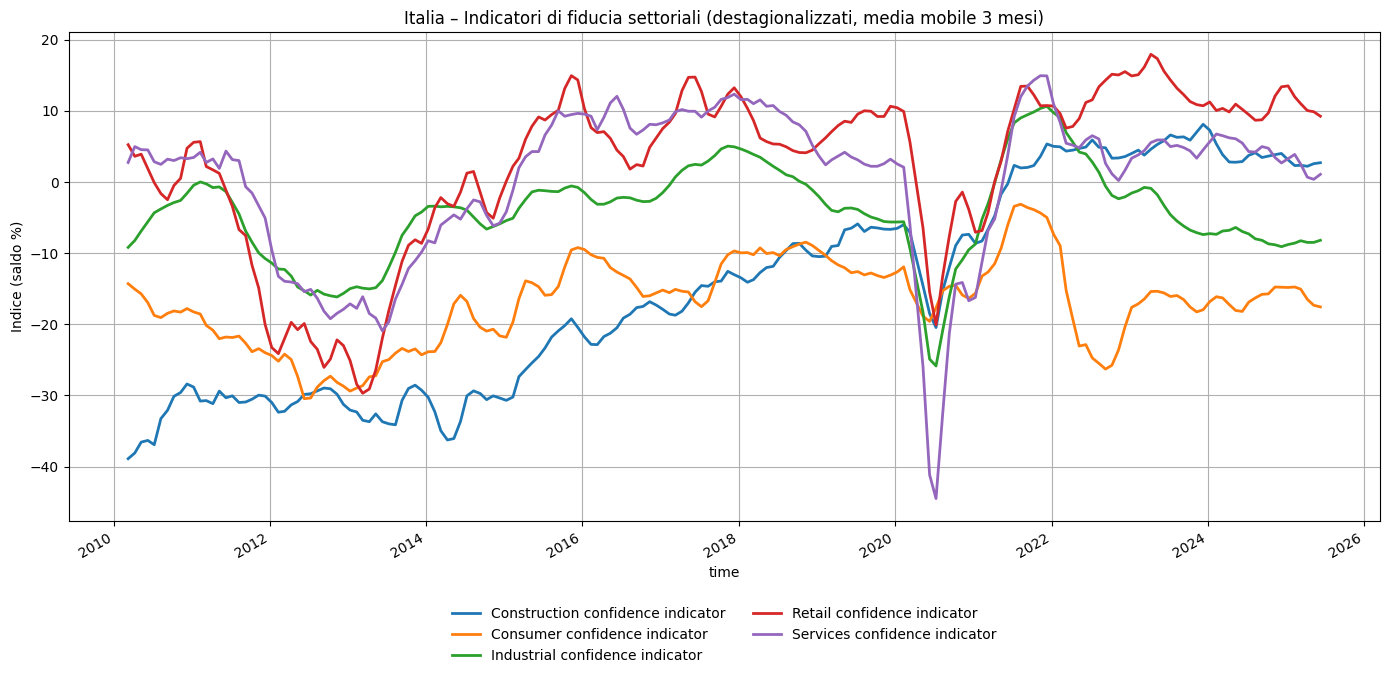

In [20]:
# 1. Filtro solo Italia
df_it = df[df["geo_code"] == "IT"]

# 2. Pivottizza: righe = tempo, colonne = indicatore
pivot_df = (
    df_it.pivot(index="time", columns="indic_label", values="value")
    .sort_index()
)

# 3. Media mobile 3 mesi (opzionale, per levigare)
smoothed = pivot_df.rolling(window=3).mean()

# 4. Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
smoothed.plot(ax=plt.gca(), linewidth=2) # media mobile
# pivot_df.plot(ax=plt.gca(), linewidth=2) # raw

plt.title("Italia – Indicatori di fiducia settoriali (destagionalizzati, media mobile 3 mesi)")
plt.ylabel("Indice (saldo %)")
plt.grid(True)
plt.tight_layout()


# 👉 Legenda sotto il grafico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=2, fancybox=True, shadow=False, frameon=False)

plt.show()


In [29]:
df['time'].max()

Timestamp('2025-06-10 00:00:00')

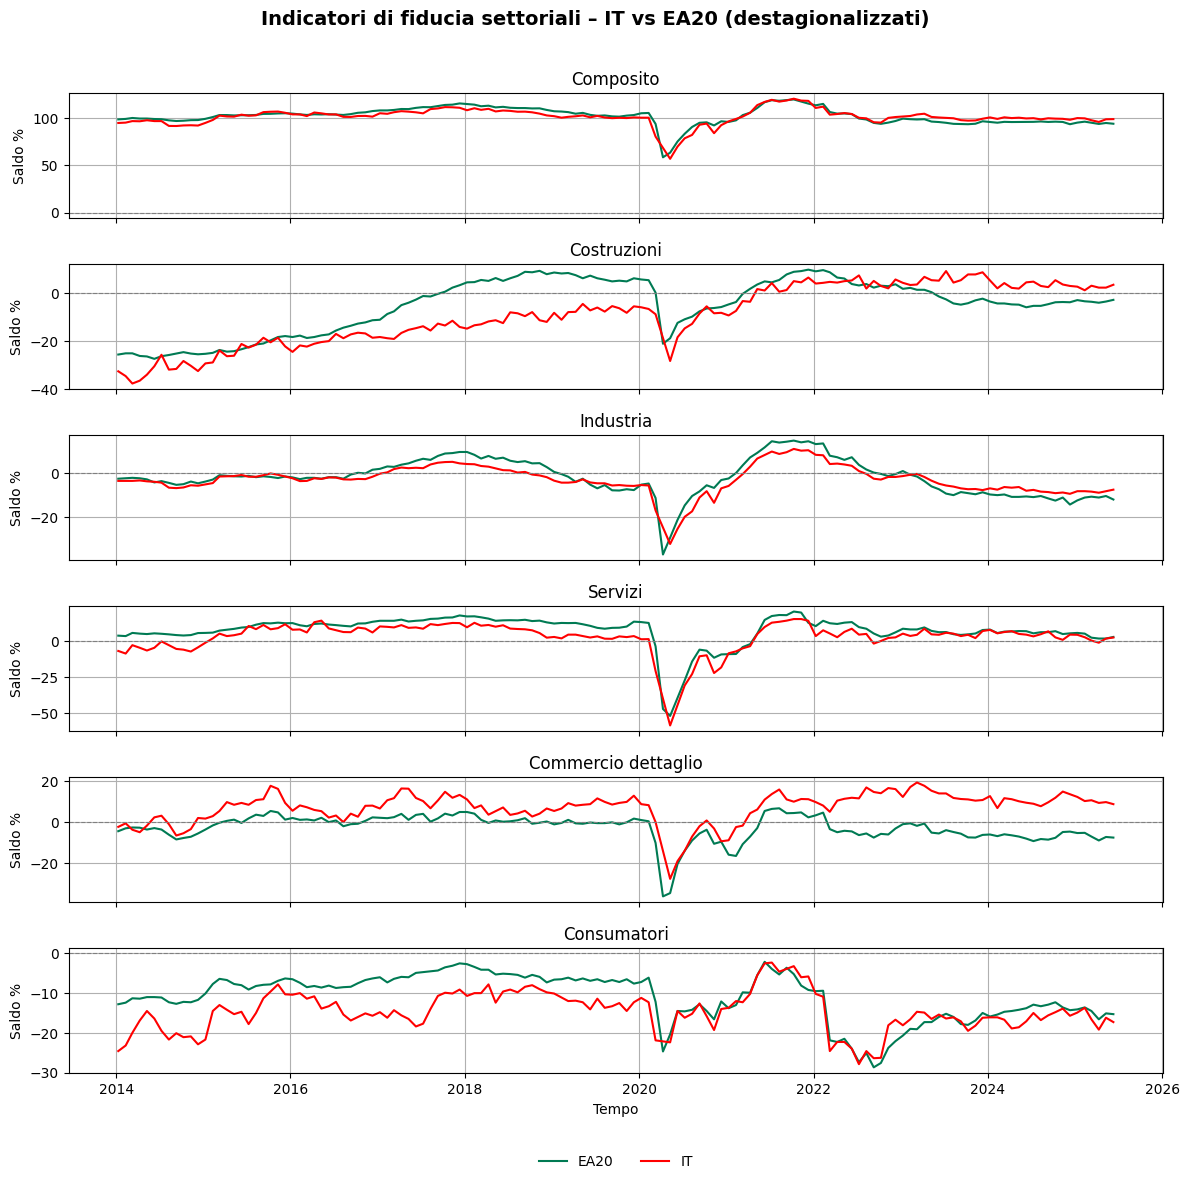

In [6]:
import matplotlib.pyplot as plt

# Filtra dati
df_facet = df[
#    (df["indic_code"] != "BS-ESI-I") &
    (df["geo_code"].isin(["IT", "EA20"])) 
     & (df["time"] > "2013-12-31")
].copy()

# Mappa etichette leggibili
label_map = {
    "BS-ESI-I": "Composito",
    "BS-CCI-BAL": "Costruzioni",
    "BS-ICI-BAL": "Industria",
    "BS-SCI-BAL": "Servizi",
    "BS-RCI-BAL": "Commercio dettaglio",
    "BS-CSMCI-BAL": "Consumatori"
}
df_facet["indic_label"] = df_facet["indic_code"].map(label_map)

# Ordine fisso indicatori
indicators_order = ["Composito","Costruzioni", "Industria", "Servizi", "Commercio dettaglio", "Consumatori"]

# Facet plot 6×1
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0.35)

for i, indic in enumerate(indicators_order):
    ax = axes[i]
    for geo, color in zip(["EA20", "IT"], ["#007a53", "#FF0000"]):
        subset = df_facet[
            (df_facet["indic_label"] == indic) &
            (df_facet["geo_code"] == geo)
        ]
        ax.plot(subset["time"], subset["value"], label=geo, color=color)
    
    ax.set_title(indic)
    ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')
    ax.grid(True)
    if i == 5:
        ax.set_xlabel("Tempo")
    ax.set_ylabel("Saldo %")

# Legenda solo nell'ultimo
#axes[-1].legend(loc='lower right')

# 👉 Legenda sotto il grafico
axes[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.55),
           ncol=2, fancybox=True, shadow=False, frameon=False)


fig.suptitle("Indicatori di fiducia settoriali – IT vs EA20 (destagionalizzati)", fontsize=14, fontweight='bold' )
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
